In [2]:
# Yes I know this notebook is a mess.

import math
import statistics as st
from statsmodels.stats.multitest import fdrcorrection as fdr
import scipy.stats
import pandas as pd
import numpy as np
from pprint import pprint
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as FF

import matplotlib.pyplot as plt
import seaborn as sns

plotly.offline.init_notebook_mode(connected=True)

DATA_LOC = "cleanData_comma.csv"

def prepare_matrix(results_data_dict, filtered=False):
    head = ["", "T-Stat", "p-val"]
    bulk = []
    # test data
    for i,j in results_data_dict.items():
        counter = 1
        for res in j.values():
            name = i + " peak" + str(counter)
            if filtered == True:
                    if res[1]<0.01:
                        bulk.append([name, res[0], res[1]]) # res[0] is Tstat, res[1] is p-val
            else:
                bulk.append([name, res[0], res[1]]) # res[0] is Tstat, res[1] is p-val
            counter+=1
    return [head] + sorted(bulk, key=lambda x: x[1], reverse=True)

def prepare_bar_data(dataframe):
    # get means
    ad_mean = []
    n24_mean = []
    n48_mean = []
    for i in range(1,47):
        ad_mean.append(round(st.mean([i for i in df["AD_"+str(i)].values if not np.isnan(i)]), 3))
        n24_mean.append(round(st.mean([i for i in df["N24_"+str(i)].values if not np.isnan(i)]), 3))
        n48_mean.append(round(st.mean([i for i in df["N48_"+str(i)].values if not np.isnan(i)]), 3))
    # get errors
    return ad_mean, n24_mean, n48_mean

In [2]:
# prepare table headers
ads = []
n24s = []
n48s = []
col_names = []
for i in range(1, 47):
    ads.append("AD_vs_24_PEAK_"+str(i))
    n24s.append("AD_vs_48_PEAK"+str(i))
    #n48s.append("N48_"+str(i))

col_names = ads + n24s

In [13]:
# CROATIAN VERSION
ads = []
n24s = []
n48s = []
col_names = []
for i in range(1, 47):
    ads.append("Frakcija "+str(i))
    n24s.append("Frakcija "+str(i))
    #n48s.append("N48_"+str(i))

col_names = ads + n24s

In [3]:
# import data to pandas.dataframe
df = pd.read_csv(DATA_LOC)

In [4]:
# check imports are ok
print(df.head())
print(df.columns.values)

   AD_1  AD_2  AD_3  AD_4   AD_5   AD_6   AD_7  AD_8  AD_9  AD_10   ...    \
0  0.49  0.05  0.58  0.21   3.35   5.44   6.38  0.53  1.77   0.15   ...     
1  1.77  0.16  1.45  0.29   8.60   7.01  11.25  3.39  2.38   0.14   ...     
2  2.55  0.20  1.97  0.49  10.60   9.67  13.52  1.29  2.61   0.35   ...     
3  3.05  0.39  1.98  0.55  10.18  11.81  13.68  1.05  2.74   0.50   ...     
4  2.69  0.26  1.70  0.39   8.90   9.06  12.31  0.88  2.29   0.40   ...     

   N48_37  N48_38  N48_39  N48_40  N48_41  N48_42  N48_43  N48_44  N48_45  \
0    1.28    1.67    1.88    1.60    1.19    2.73    0.98    1.41    0.71   
1    1.28    1.37    2.20    1.95    1.42    3.82    1.32    2.60    0.68   
2    1.66    1.79    1.07    1.44    1.20    2.88    1.85    2.16    0.70   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

   N48_46  
0    0.16  
1    0.34  
2    0.12  
3     NaN  
4     NaN  

[

In [5]:
results = {
    "AD_vs_N24": {},
    "AD_vs_N48": {},
    #"N24_vs_N48": {}
}

# automate T-Testing
for i in range(1,47):
    # test ADULT<i> vs N24<i>
    ADi_logged = [math.log2(i) for i in df["AD_"+str(i)].values if not np.isnan(i)]
    N24i_logged = [math.log2(i) for i in df["N24_"+str(i)].values if not np.isnan(i)]
    twosampleT_result = scipy.stats.ttest_ind(ADi_logged, N24i_logged)
    results["AD_vs_N24"][i] = twosampleT_result
    
    # test ADULT<i> vs N48<i>
    ADi_logged = [math.log2(i) for i in df["AD_"+str(i)].values if not np.isnan(i)]
    N48i_logged = [math.log2(i) for i in df["N48_"+str(i)].values if not np.isnan(i)]
    twosampleT_result = scipy.stats.ttest_ind(ADi_logged, N48i_logged)
    results["AD_vs_N48"][i] = twosampleT_result
    
    # test N24<i> vs N48<i>
#     N24i_logged = [math.log2(i) for i in df["N24_"+str(i)].values if not np.isnan(i)]
#     N48i_logged = [math.log2(i) for i in df["N48_"+str(i)].values if not np.isnan(i)]
#     twosampleT_result = scipy.stats.ttest_ind(N24i_logged, N48i_logged)
#     results["N24_vs_N48"][i] = twosampleT_result    

In [6]:
pprint(results["AD_vs_N24"][1][1])

0.044870440330556566


In [14]:
tests_matrix = prepare_matrix(results, True)
#pprint(tests_matrix)
twosample_table = FF.create_table(tests_matrix, index=True)
plotly.offline.iplot(twosample_table, filename='T-test results')

In [8]:
print(f"AD vs N24 FOR 16: {results['AD_vs_N24'][16][1]}, mean AD: {st.mean([i for i in df['AD_16'].values if not np.isnan(i)])}, mean 24: {st.mean([i for i in df['N24_16'].values if not np.isnan(i)])}")
print(f"AD vs N48 FOR 16: {results['AD_vs_N48'][16][1]}, mean: {st.mean([i for i in df['AD_16'].values if not np.isnan(i)])}, mean 48 {st.mean([i for i in df['N48_16'].values if not np.isnan(i)])}")

AD vs N24 FOR 16: 0.00031660272207015717, mean AD: 3.572, mean 24: 1.385
AD vs N48 FOR 16: 0.0012429369038371226, mean: 3.572, mean 48 1.3933333333333333


In [37]:
def prep_correction(results_data_dict):
    pvals = []
    # test data
    for i,j in results_data_dict.items():
        counter = 1
        for res in j.values():
            pvals.append(res[1]) # res[0] is Tstat, res[1] is p-val
            counter+=1
    return pvals

all_p_val = prep_correction(results)
corrected = fdr(all_p_val)
res_significant = []
for i in range(len(col_names)):
    if corrected[0][i]:
        res_significant.append([col_names[i], round(corrected[1][i], 3)]) #, corrected[0][i]])

# prep_for_table = [["Peak", "Adjusted p-val", "Significant"]] + res_significant

#for Cro ver
prep_for_table = [["ODRASLI vs N24h", "Korigirana p-vrijednost (FDR)"]] + res_significant[0:12]

sig_table = FF.create_table(prep_for_table, index=False)
sig_table.layout.width=450
plotly.offline.iplot(sig_table, filename='FDR corr results')


In [38]:
prep_for_table = [["ODRASLI vs N48h", "Korigirana p-vrijednost (FDR)"]] + res_significant[12:]

sig_table = FF.create_table(prep_for_table, index=False)
sig_table.layout.width=450
plotly.offline.iplot(sig_table, filename='FDR corr results')

In [4]:
avg_oligo_ad = [
    15.22,16.215, 19.145, 20.28, 17.76,
]
avg_oligo_48 = [
    13.795, 12.305 ,12.18,
]
avg_oligo_24 = [
    11.68, 14.335, 14.125, 14.125,
]

oligo_tt_AD_v_48 = scipy.stats.ttest_ind(avg_oligo_ad, avg_oligo_48)
oligo_tt_AD_v_24 = scipy.stats.ttest_ind(avg_oligo_ad, avg_oligo_24)

print(f"OLIGO RES:\n\tp(AD v 24): {oligo_tt_AD_v_24.pvalue}\n\tp(AD v 48): {oligo_tt_AD_v_48.pvalue}\npval sig <{0.05/2}")


OLIGO RES:
	p(AD v 24): 0.009910001478099704
	p(AD v 48): 0.008473272961609416
pval sig <0.025


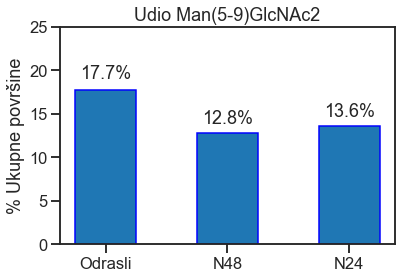

In [14]:
width = 0.5
plot_data = [st.mean(i) for i in [avg_oligo_ad, avg_oligo_48, avg_oligo_24]]
ind = np.arange(len(plot_data))
ticks = ["Odrasli", "N48", "N24"]
sns.set_context("talk")
sns.set_style("white",
    {
    'xtick.bottom': True,
    'ytick.left': True,
    'patch.edgecolor': 'b',
    }
)
fig, ax = plt.subplots()
oligo_bars = ax.bar(ind, plot_data, width)
plt.xticks(ind, ticks)
plt.ylabel('% Ukupne površine')
plt.title('Udio Man(5-9)GlcNAc2')
plt.ylim(ymax=25)
for bar in oligo_bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., 1.05*height,
                f"{round(height,1)}%",
                ha='center', va='bottom')

plt.show()
fig.savefig("oligoman_content.pdf")